<a href="https://colab.research.google.com/github/akash-murugadoss/PRODIGY_DS_04/blob/main/task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
twitter_data = pd.read_csv("/content/twitter_training.csv")
twitter_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
twitter_data = pd.read_csv('twitter_training.csv', names=col_names)

twitter_data.head()


,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data['Content'] = twitter_data['Content'].str.lower()
twitter_data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [ ]:
twitter_data['Content'] = twitter_data['Content'].astype(str)  # Convert column to string type
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: re.sub(r'http\S+', '', str(x)))
twitter_data.sample(20)

,ID,Entity,Sentiment,Content
46547,11987,Verizon,Negative,i so so disappointed in @verizon! such a knock...
71093,10978,TomClancysGhostRecon,Positive,the sync shot is great for eliminating little ...
64364,7827,MaddenNFL,Negative,katy's inclusion means it probably stinks
23507,4429,Google,Neutral,buy remove bad comments on google - get bad re...
7754,9332,Overwatch,Positive,never tire of getting a good reward in overtime
57056,11388,TomClancysRainbowSix,Positive,i love all r6 crossovers and crossovers with a...
62528,5119,GrandTheftAuto(GTA),Positive,"it looked pretty cool, too..."
62975,5195,GrandTheftAuto(GTA),Negative,<unk> be mad as fuck if the next gta in chicag...
50713,6305,FIFA,Positive,lots of juicy fifa content today
29280,636,ApexLegends,Positive,this is beautiful


In [ ]:
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
twitter_data.sample(15)

,ID,Entity,Sentiment,Content
33729,6593,Fortnite,Irrelevant,by far my best stream without a raid there wer...
9150,9572,Overwatch,Neutral,facts king talk that shit so much they dont no...
35250,8055,Microsoft,Positive,special shoutouts to microsoft excel
18820,12425,WorldOfCraft,Irrelevant,remember when then he pushed a remote remote u...
1232,2616,Borderlands,Positive,cheers borderlands didnt want that legendary ...
16213,3175,Dota2,Positive,best chatwhell from dota space created my b...
56144,11236,TomClancysRainbowSix,Negative,rainbowgame im tired of this broken game and ...
47107,5682,HomeDepot,Neutral,i sneezed in the home depot queue and everyone...
62251,5071,GrandTheftAuto(GTA),Positive,i got gacha lucky in gta ive won cars in the ...
13173,8662,NBA2K,Negative,the nbak update literally broke the corner dr...


In [ ]:
# Tokenize text
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: word_tokenize(x))

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: ' '.join(x))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = {'Sentiment': ['positive', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral']}
df = pd.DataFrame(data)
sentiment_counts = df['Sentiment'].value_counts()


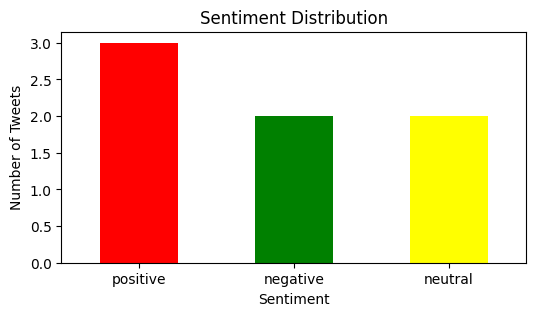

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


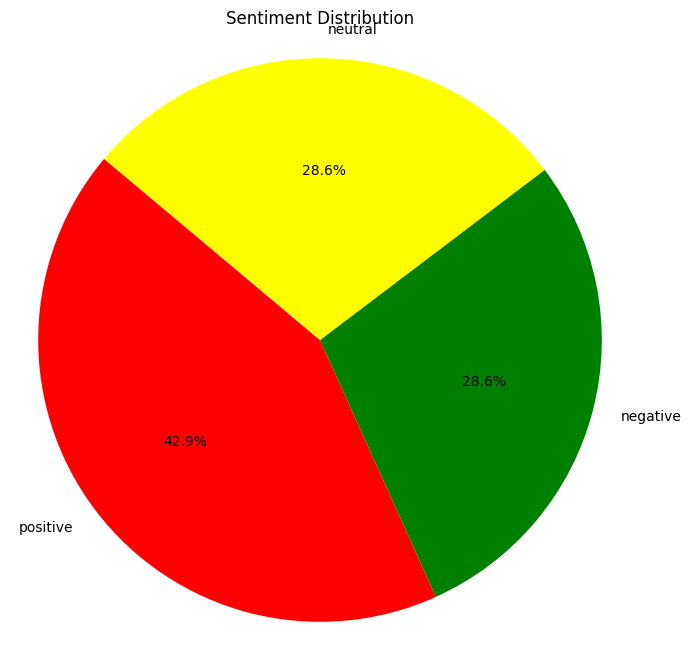

In [ ]:
import matplotlib.pyplot as plt

# Assuming sentiment_counts is already calculated
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()